In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
# from pythonds.basic.stack import Stack
from math import *
import random
from sklearn.neighbors import KDTree
import random

In [28]:
# Define all relevant physical variables needed throughout the program, including:
# - number of LRG sources
# - number of survey (non-LRG) sources
# - coordinates for LRGs
# - coordinates for survey sources
# - projected radius from LRGs
# - LRG redshift
# - gmag and rmag for survey sources
# - gmag and rmag for LRGs
# - (g-r) color survey sources
# - (g-r) color for LRGs

# Number of LRG sources
lrg = 50

# Number of survey (non-LRG) sources
survey = 1000

# Fake coordinates for LRG sources
random.seed(10)
x0 = [random.uniform(0,5) for j in range(lrg)]

random.seed(10)
y0 = [random.uniform(0,5) for j in range(lrg)]

y0 = random.sample(y0, len(y0))
print("length of fake LRG sources (ra) = ", len(x0))
print("length of fake LRG sources (dec) = ", len(y0))
# print("x0 = ", x0)
# print("y0 = ", y0)
# print(type(y0))

# Fake coordinates for survey sources
x1 = [random.uniform(0,5) for j in range(survey)]

y1 = [random.uniform(0,5) for j in range(survey)]
y1 = random.sample(y1, len(y1))
    
print("length of fake survey sources (ra) = ", len(x1))
print("length of fake survey sources (dec) = ", len(y1))    

# In order for there to be at least one guaranteed satellite, combine the survey and lrg position arrays so that one
# survey source position is the same as an LRG position
x_plus = np.concatenate([x0, x1])
y_plus = np.concatenate([y0, y1])

print("length of x_plus (ra) (lrgs + survey) =", len(x_plus))
print("length of y_plus (dec) (lrg + survey) =", len(y_plus))

# Redshift for LRG 
random.seed(10)
z = [random.uniform(0.1,0.5) for j in range(lrg)]
    
print("length of array of redshifts for fake LRGs =", len(z))
print("max z = ", np.amax(z))
print("min z = ", np.amin(z))

# Magnitudes for survey sources
gmag_plus = [random.uniform(14,29) for j in range(len(x_plus))]
rmag_plus = [random.uniform(13,24) for j in range(len(x_plus))]

gmag_plus = np.array(gmag_plus)
rmag_plus = np.array(rmag_plus)
color_plus = gmag_plus - rmag_plus
    
print("length of gmag for survey soruces =", len(gmag_plus))
print("length of rmag for survey soruces =", len(rmag_plus))
print("max gmag_plus = ", np.amax(gmag_plus))
print("min gmag_plus = ", np.amin(gmag_plus))
print("max rmag_plus = ", np.amax(rmag_plus))
print("min rmag_plus = ", np.amin(rmag_plus))
print("length of color_plus = ", len(color_plus))
print("max color = ", np.amax(color_plus))
print("min color = ", np.amin(color_plus))

# Magnitudes for LRG sources
gmag_lrg = [random.uniform(17,23) for j in range(lrg)]
rmag_lrg = [random.uniform(16,21) for j in range(lrg)]
    
print("length of gmag for survey soruces =", len(gmag_lrg))
print("length of rmag for survey soruces =", len(rmag_lrg))
print("max gmag_lrg = ", np.amax(gmag_lrg))
print("min gmag_lrg = ", np.amin(gmag_lrg))
print("max rmag_lrg = ", np.amax(rmag_lrg))
print("min rmag_lrg = ", np.amin(rmag_lrg))

# Make an array of the magnitudes of LRGs and survey sources; LRGs are first.
# gmag_plus = np.concatenate([gmag_lrg, gmag_survey])
# rmag_plus = np.concatenate([rmag_lrg, rmag_survey])

# print("length of gmag_plus =", len(gmag_plus))
# print("length of rmag_plus =", len(rmag_plus))

# color_plus = gmag_plus - rmag_plus

# print("length of color_plus = ", len(color_plus))
# print("max color = ", np.amax(color_plus))
# print("min color = ", np.amin(color_plus))

# gmag_survey = np.array(gmag_survey)
# rmag_survey = np.array(rmag_survey)
# color_survey = gmag_survey - rmag_survey

# print("length of color_survey = ", len(color_survey))

# gmag_lrg = np.array(gmag_lrg)
# rmag_lrg = np.array(rmag_lrg)
# color_lrg = gmag_lrg - rmag_lrg

# print("length of color_lrg = ", len(color_lrg))

# # Make an array of the RA/Dec of LRGs and survey+ sources; LRGs are first.
# x_all = np.concatenate([x0, x1])
# y_all = np.concatenate([y0, y1])

# print("length of x_all (ra) =", len(x_all))
# print("length of y_all (dec) =", len(y_all))

# Make an array of the magnitudes of LRGs and survey+ sources; LRGs are first.
# gmag_all = np.concatenate([gmag_lrg, gmag_plus])
# rmag_all = np.concatenate([rmag_lrg, rmag_plus])

# print("length of gmag_all =", len(gmag_all))
# print("length of rmag_all =", len(rmag_all))

# color_all = gmag_all - rmag_all

# print("length of color_all = ", len(color_all))

distance = 1. # in Mpc
print("distance in Mpc =", distance)
distance_kpc = distance * 10.**3. # in kpc
print("distance in kpc = ", distance_kpc)

length of fake LRG sources (ra) =  50
length of fake LRG sources (dec) =  50
length of fake survey sources (ra) =  1000
length of fake survey sources (dec) =  1000
length of x_plus (ra) (lrgs + survey) = 1050
length of y_plus (dec) (lrg + survey) = 1050
length of array of redshifts for fake LRGs = 50
max z =  0.498622797016
min z =  0.101622057663
length of gmag for survey soruces = 1050
length of rmag for survey soruces = 1050
max gmag_plus =  28.99756949
min gmag_plus =  14.0083579271
max rmag_plus =  23.9832634534
min rmag_plus =  13.0050148634
length of color_plus =  1050
max color =  15.8068025395
min color =  -9.5316248966
length of gmag for survey soruces = 50
length of rmag for survey soruces = 50
max gmag_lrg =  22.5593746
min gmag_lrg =  17.1251822757
max rmag_lrg =  20.9663774795
min rmag_lrg =  16.0635083903
distance in Mpc = 1.0
distance in kpc =  1000.0


In [29]:
# cosmoCalc function to find comoving radial distance (DCMR_Mpc) and scale (kpc_DA)

def cosmoCalc(z):

# 	import numpy as np
# 	from math import sqrt
# 	from math import exp
# 	from math import sin
# 	from math import pi

# Calculate scale to get areas
	H0 = 69.6
	WM = 0.286
	WV = 0.714
# z = 0.209855

# initialize constants

	WR = 0.        # Omega(radiation)
	WK = 0.        # Omega curvaturve = 1-Omega(total)
	c = 299792.458 # velocity of light in km/sec
	Tyr = 977.8    # coefficent for converting 1/H into Gyr
	DTT = 0.5      # time from z to now in units of 1/H0
	DTT_Gyr = []  # value of DTT in Gyr
	age = 0.5      # age of Universe in units of 1/H0
	age_Gyr = []  # value of age in Gyr
	zage = 0.1     # age of Universe at redshift z in units of 1/H0
	zage_Gyr = [] # value of zage in Gyr
	DCMR = 0.0     # comoving radial distance in units of c/H0
	DCMR_Mpc = [] 
	DCMR_Gyr = []
	DA = 0.0       # angular size distance
	DA_Mpc = []
	DA_Gyr = []
	kpc_DA = []
	DL = 0.0       # luminosity distance
	DL_Mpc = []
	DL_Gyr = []   # DL in units of billions of light years
	V_Gpc = []
	a = 1.0        # 1/(1+z), the scale factor of the Universe
	az = 0.5       # 1/(1+z(object))

	h = H0/100.
	WR = 4.165E-5/(h*h)   # includes 3 massless neutrino species, T0 = 2.72528
	WK = 1.-WM-WR-WV

	for j in range(len(z)):
		az = 1.0/(1+1.0*z[j])
		age = 0.
		n=1000         # number of points in integrals
		for i in range(n):
			a = az*(i+0.5)/n
			adot = sqrt(WK+(WM/a)+(WR/(a*a))+(WV*a*a))
			age = age + 1./adot

		zage = az*age/n
		zage_Gyr.append((Tyr/H0)*zage)
		DTT = 0.0
		DCMR = 0.0

	# do integral over a=1/(1+z) from az to 1 in n steps, midpoint rule
		for i in range(n):
			a = az+(1.-az)*(i+0.5)/n
			adot = sqrt(WK+(WM/a)+(WR/(a*a))+(WV*a*a))
			DTT = DTT + 1./adot
			DCMR = DCMR + 1./(a*adot)

		DTT = (1.-az)*DTT/n
		DCMR = (1.-az)*DCMR/n
		age = DTT+zage
		age_Gyr.append(age*(Tyr/H0))
		DTT_Gyr.append((Tyr/H0)*DTT)
		DCMR_Gyr.append((Tyr/H0)*DCMR)
		DCMR_Mpc.append((c/H0)*DCMR)

	# tangential comoving distance

		ratio = 1.00
		x = sqrt(abs(WK))*DCMR
		if x > 0.1:
			if WK > 0:
				ratio =  0.5*(exp(x)-exp(-x))/x 
			else:
				ratio = sin(x)/x
		else:
			y = x*x
		if WK < 0: y = -y
		ratio = 1. + y/6. + y*y/120.
		DCMT = ratio*DCMR
		DA = az*DCMT
		DA_Mpc.append((c/H0)*DA)
		kpc_DA.append(DA_Mpc[j]/206.264806)
		DA_Gyr.append((Tyr/H0)*DA)
		DL = DA/(az*az)
		DL_Mpc.append((c/H0)*DL)
		DL_Gyr.append((Tyr/H0)*DL)

	# comoving volume computation

		ratio = 1.00
		x = sqrt(abs(WK))*DCMR
		if x > 0.1:
			if WK > 0:
				ratio = (0.125*(exp(2.*x)-exp(-2.*x))-x/2.)/(x*x*x/3.)
			else:
				ratio = (x/2. - sin(2.*x)/4.)/(x*x*x/3.)
		else:
			y = x*x
			if WK < 0: y = -y
			ratio = 1. + y/5. + (2./105.)*y*y
		VCM = ratio*DCMR*DCMR*DCMR/3.
		V_Gpc.append(4.*pi*((0.001*c/H0)**3)*VCM)

	return(age_Gyr, zage_Gyr, DTT_Gyr, DL_Mpc, DL_Gyr, V_Gpc, DA_Mpc, DA_Gyr, DCMR_Mpc, DCMR_Gyr, kpc_DA, DL_Mpc, DL_Gyr)


age_Gyr, zage_Gyr, DTT_Gyr, DL_Mpc, DL_Gyr, V_Gpc, DA_Mpc, DA_Gyr, DCMR_Mpc, DCMR_Gyr, kpc_DA, DL_Mpc, DL_Gyr = cosmoCalc(z)


H:
[[  0.   0.   0.   0.   0.  15.  11.  10.  11.  17.   6.  10.   8.]
 [  0.   0.   0.   0.   2.   9.   6.  17.  12.  12.  16.  11.   4.]
 [  0.   0.   0.   0.  11.  13.  11.  15.  11.  16.   8.   6.   0.]
 [  0.   0.   0.   3.  10.  11.  15.  17.  17.  16.   6.   2.   0.]
 [  0.   0.   0.  13.   9.  16.  21.  12.  17.  15.  11.   0.   0.]
 [  0.   0.   2.   9.   9.  10.  18.  18.   6.  17.   4.   0.   0.]
 [  0.   0.   4.  14.  15.  10.  10.  20.  12.   6.   0.   0.   0.]
 [  0.   3.  10.   6.  11.  11.  19.  13.  11.   2.   0.   0.   0.]
 [  0.  13.  13.   9.  14.  16.   5.  20.   8.   0.   0.   0.   0.]
 [  4.  12.  18.  14.  11.  13.  17.   8.   3.   0.   0.   0.   0.]
 [ 14.  12.  12.  10.  12.  18.  14.  11.   0.   0.   0.   0.   0.]]
-------
sd:
[[ 0.    0.    0.    0.    0.    0.6   0.44  0.4   0.44  0.68  0.24  0.4
   0.32]
 [ 0.    0.    0.    0.    0.08  0.36  0.24  0.68  0.48  0.48  0.64  0.44
   0.16]
 [ 0.    0.    0.    0.    0.44  0.52  0.44  0.6   0.44  0.64  0.32  0.

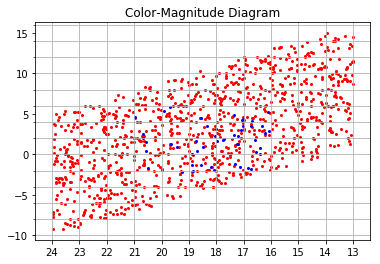

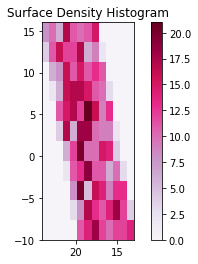

xedges =  [ 13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.]
yedges =  [-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.  12.  14.  16.]


In [30]:
# Calculate surface density as a function of color and magniude by making a 2D histogram and dividing by the area
# of the survey space

# Create a 2D histogram that creates evenly-spaced bins and counts the points in each bin
# H is the matrix with the number of points per bin
# xedges, yedges are the bounds of the bins
# H, xedges, yedges = np.histogram2d(x0, y0, bins=[5,5], normed=False)

# row = 5
# column = 5

xedges = np.array([13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])
yedges = np.array([-10., -8., -6., -4., -2., 0., 2., 4., 6., 8., 10., 12., 14., 16.]) 

# xedges =  [ 13.,  15.,  17.,   19.,  21., 24.]
# yedges =  [ -10.,  -5.,   0.,   5.,  11., 16.]

H, xedges, yedges = np.histogram2d(rmag_plus, color_plus, bins=(xedges,yedges), normed=False)
print("H:")
print(H)
print('-------')

# Uses the numbers counted in the histogram to calculate a surface density: For each cell, the number of sources
# divided by the area 
sd = H/25.
print("sd:")
print(sd)
print('-------')

# Scatter plot of points with bin lines drawn
fig, ax = plt.subplots()
ax.set_xticks(xedges, minor=False)
ax.set_yticks(yedges, minor=True)
ax.xaxis.grid(True, which='major')
ax.yaxis.grid(True, which='minor')

plt.scatter(rmag_survey, color_survey, s = 4, color='red')
plt.scatter(rmag_lrg, color_lrg, s = 4, color='blue')
plt.gca().invert_xaxis()
plt.title("Color-Magnitude Diagram")
plt.show()

# color codes bins by surface density with color bar; should make sense when compared to scatter plot
plt.imshow(H, cmap=plt.cm.PuRd, extent=(xedges[0], xedges[len(xedges)-1], yedges[0], yedges[len(yedges)-1]))
plt.colorbar(orientation='vertical')
plt.gca().invert_xaxis()
plt.title("Surface Density Histogram")
plt.show()

# Playing with only plotting one bin at a time. Not useful now but I don't want to forget it.
# dx = x[np.where((x>=xedges[1]) & (x<=xedges[2]) & (y>=yedges[1]) & (y<=yedges[2]))]
# dy = y[np.where((x>=xedges[1]) & (x<=xedges[2]) & (y>=yedges[1]) & (y<=yedges[2]))]

# plt.scatter(dx,dy)
# plt.show()

# print(H.shape)

# print(sd[0,0])
# print(sd[0,1])
# print(sd[1,0])
# print(sd[1,1])

print("xedges = ", xedges)
print("yedges = ", yedges)

dist is [0.05809487989228025, 0.06632996680641352, 0.05778033754884466, 0.08985348940952298, 0.04933970952342921, 0.049060152199827484, 0.054570786917085404, 0.09792414299334354, 0.06066572956565499, 0.07471807921209904, 0.08353073974281454, 0.04597949751211992, 0.04509357918302467, 0.12955431506587659, 0.048109472421382145, 0.0566458106770511, 0.06991040317911858, 0.07940073031000958, 0.05375592572537733, 0.06444493840722666, 0.05335782593533643, 0.05424849937378073, 0.103644046956944, 0.05065085192036973, 0.0453724890291038, 0.0456356434902532, 0.056207142132784764, 0.12966726729005745, 0.14748180687858062, 0.1034209359973112, 0.046231057647159075, 0.07726647840291401, 0.07120331692144603, 0.04718991790320011, 0.07606128321789996, 0.0591892137907603, 0.06583313879591826, 0.12226492717440525, 0.057481766835172074, 0.04851937912371394, 0.0986774406685351, 0.08708815902924542, 0.06748432268907659, 0.13254379643566733, 0.06201206739478908, 0.04921207270034191, 0.05439995430023007, 0.0599

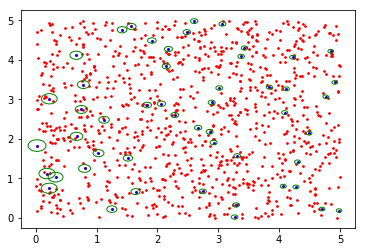

nn = [2 1 2 1 1 1 1 1 1 1 1 2 1 5 1 1 1 1 1 2 2 1 2 2 2 1 1 3 1 2 1 1 2 1 1 2 1
 1 1 2 2 2 1 3 2 1 4 1 1 4]
nn index =  [array([182,   0]) array([1]) array([602,   2]) array([3]) array([4])
 array([5]) array([6]) array([7]) array([8]) array([9]) array([10])
 array([888,  11]) array([12]) array([309,  13, 969, 502, 307]) array([14])
 array([15]) array([16]) array([17]) array([18]) array([146,  19])
 array([ 20, 189]) array([21]) array([ 22, 754]) array([ 23, 370])
 array([426,  24]) array([25]) array([26]) array([834, 636,  27])
 array([28]) array([939,  29]) array([30]) array([31]) array([859,  32])
 array([33]) array([34]) array([ 35, 962]) array([36]) array([37])
 array([38]) array([696,  39]) array([670,  40]) array([ 41, 171])
 array([42]) array([ 43, 507, 816]) array([73, 44]) array([45])
 array([ 79, 432,  46, 521]) array([47]) array([48])
 array([  49,  742,   81, 1043])]
total index array:  [ 182    0    1  602    2    3    4    5    6    7    8    9   10  888   11
   12  309  

In [33]:
# Counting near neighbors using KDTree
# Result is an array of the number of near neighbors each LRG has

dist = [] # in degree
for i in range(len(kpc_DA)):
    dist.append((distance_kpc / kpc_DA[i]) * (1./3600.)) 

print("dist is", dist)

# Plots LRG sources and EDR sources
plt.scatter(x_all, y_all, s = 3, color='red')
plt.scatter(x0, y0, s = 3, color='blue')

# Draws circle of some radius around the LRG sources
# Circles too small to really see in the plot, but I have tested it with bigger radii to make sure it works if I
# ever need it.
circle = []
for i in range(len(x0)):
    circle = plt.Circle((x0[i],y0[i]), dist[i], color='green', fill=False)
    plt.gcf().gca().add_artist(circle)

plt.show()

# Creates a list of ordered pairs; zips ra and dec together so they can be fed into KDTree
# zip_list0 = list(zip(x0, y0))
zip_list0 = list(zip(x0, y0)) # Fake LRG sources
zip_list1 = list(zip(x_plus, y_plus)) # Fake EDR sources
# print(type(zip_list))
# print(zip_list)
# print(zip_list0[0])

# Creates a tree of EDR sources
gal_tree = KDTree(zip_list1)

# returns a list of EDR sources that are within some radius r of an LRG
nn = gal_tree.query_radius(zip_list0,r=dist,count_only=True)
print("nn =", nn)
# print("length of nn = ", len(nn))

# find indices of near neighbors
ind = gal_tree.query_radius(zip_list0,r=dist)
# print("length of nn index = ", len(ind))
print("nn index = ", ind)
# print("index 0 =", ind[0])
# print("index 1 =", ind[1])
# print("index 2 =", ind[2])
# print("index 3 =", ind[3])
# print("index 4 =", ind[4])
# print("index 5 =", ind[5])
# print("index 6 =", ind[6])
# print("index 7 =", ind[7])
# print("index 8 =", ind[8])
# print("index 9 =", ind[9])

# print(type(ind[0]))
# print(type(ind))

total_ind = np.concatenate(ind)
print("total index array: ", total_ind)
print(len(total_ind))

# Array that gives actual number of near neighbors for every LRG
num = []

for i in range(len(ind)):
    num.append(len(ind[i]))

print("num is", num)
print("length of num is", len(num))

# print(type(ind))
# print(type(ind[0]))

In [42]:
# Create 2D histograms in bins of color and magnitude for near neighbors found above
# Result is a 2D array of the number of near neighbors for every LRG in bins of color and magnitude.

near = []

# Creates one list of number of near neighbors for every LRG (number of lists = number of LRGs)
for i in range(len(ind)):
    if len(ind[i]) == 0:
        hist2d = np.zeros((len(xedges),len(yedges)))
        near.append(hist2d)
#         print("list is empty")
    else:
#         print(ind[i])
#         print(i)
        hist2d, x_notuse, y_notuse = np.histogram2d(rmag_plus[ind[i]], color_plus[ind[i]], bins=[xedges, yedges], normed=False)
        near.append(hist2d)
#         print(hist2d)

print(np.shape(near))

# print(near[0][6][7])
# print(near[0])

(50, 11, 13)


In [6]:
# Make CMDs for LRG near neighbors

# First, make one CMD for one set of near neighbors 

# Magnitudes for survey sources
# for i in range(1000):
#     gmag_survey = [random.uniform(1,100) for j in range(100)]
#     rmag_survey = [random.uniform(1,100) for j in range(100)]
    
# print("length gmag_survey = ", len(gmag_survey))
# print("length rmag_survey = ", len(rmag_survey))
# print("gmag_survey = ", gmag_survey[0])
# print("rmag_survey = ", rmag_survey[0])

# ra = x1
# dec = y1
# index = []
# print("length ind = ", len(ind))

# for i in range(len(ind)):
#     index = ind[i]
#     index_full = []
# #     print("index = ", index)
# #     print(type(index))
#     for j in range(len(index)):
#         index_full.append(index[j])
#     print("index_full = ", index_full)
#     print("first index = ", index_full[0])
#     gmag_near = []
#     rmag_near = []
#     color = []
#     for k in range(len(index_full)):
#         gmag_near.append(gmag_survey[index_full[k]])
#         rmag_near.append(rmag_survey[index_full[k]])
#     print("length gmag = ", len(gmag_near))
#     print("length rmag = " , len(rmag_near))
#     color.append(np.array(gmag_near) - np.array(rmag_near))
#     plt.scatter(rmag_near, color, color = "teal")
#     plt.show()
    

# gmag_near0 = []
# rmag_near0 = []

# for i in range(len(ind0)):
#     gmag_near0.append(gmag_survey[ind0[i]])
#     rmag_near0.append(rmag_survey[ind0[i]])

# # print(gmag_near0)
# # print(rmag_near0)
# print(len(ind0))
# print(len(gmag_near0))
# print(len(rmag_near0))
# print(type(rmag_near0))

# gmag_near0 = np.array(gmag_near0)
# rmag_near0 = np.array(rmag_near0)

# color = gmag_near0 - rmag_near0

# plt.scatter(rmag_near0, color, color="teal")
# plt.show()

(50, 11, 13)
Nbkg is [array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.00360423,  0.0026431 ,  0.00240282,  0.0026431 ,  0.0040848 ,
         0.00144169,  0.00240282,  0.00192226],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.00048056,
         0.00216254,  0.00144169,  0.0040848 ,  0.00288339,  0.00288339,
         0.00384451,  0.0026431 ,  0.00096113],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.0026431 ,
         0.00312367,  0.0026431 ,  0.00360423,  0.0026431 ,  0.00384451,
         0.00192226,  0.00144169,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.00072085,  0.00240282,
         0.0026431 ,  0.00360423,  0.0040848 ,  0.0040848 ,  0.00384451,
         0.00144169,  0.00048056,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.00312367,  0.00216254,
         0.00384451,  0.00504592,  0.00288339,  0.0040848 ,  0.00360423,
         0.0026431 ,  0.        ,  0.        ],
       [

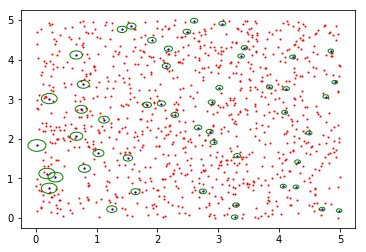

In [48]:
# Calculates number of expected interloper galaxies by first calculating the solid angle omega enclosed in radius r from 
# the LRG. Then find the number of interloper galaxies by multiplying omega by the surface density to find the 
# number of interloper galaxies as a function of color and magnitude.

area = []
area = np.pi * distance**2. # in square Mpc
# print("comoving radial distance = ",DCMR_Mpc)

# Calculate solid angle omega for every rad
omega = []

for i in range(len(DCMR_Mpc)):
    omega.append((area / (DCMR_Mpc[i])**2.) * (180./np.pi)**2.) # in square degrees

# print("rad is", rad)
# print("omega is", omega)
# print(type(omega))
# print(r[1]) 


# Multiply omega by the surface density
# Like the code above, this needs to be reshaped to make bins of color and magnitude.
Nbkg = []

for i in range(len(omega)):
    bkg = sd * omega[i]
    Nbkg.append(bkg)
#     print(i)
#     print(Nbkg[i])
    
print(np.shape(Nbkg))
print("Nbkg is", Nbkg)
print(len(DCMR_Mpc))
    
# Plots LRG sources and EDR sources
plt.scatter(x_plus, y_plus, s = 1, color='red')
plt.scatter(x0, y0, s = 1, color='blue')

circle = []
for i in range(len(x0)):
    circle = plt.Circle((x0[i],y0[i]), dist[i], color='green', fill=False)
    plt.gcf().gca().add_artist(circle)

# plt.xlim(0.,1.)
# plt.ylim(1.,2.)
plt.show()

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00  -3.60423139e-03  -2.64310302e-03  -2.40282093e-03
   -2.64310302e-03  -4.08479558e-03  -1.44169256e-03  -2.40282093e-03
   -1.92225674e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   -4.80564185e-04  -2.16253883e-03  -1.44169256e-03  -4.08479558e-03
   -2.88338511e-03  -2.88338511e-03  -3.84451348e-03  -2.64310302e-03
   -9.61128371e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   -2.64310302e-03  -3.12366721e-03  -2.64310302e-03  -3.60423139e-03
   -2.64310302e-03  -3.84451348e-03  -1.92225674e-03  -1.44169256e-03
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00  -7.20846278e-04
   -2.40282093e-03  -2.64310302e-03  -3.60423139e-03  -4.08479558e-03
   -4.08479558e-03  -3.84451348e-03  -1.44169256e-03  -4.80564185e-04
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00  -3.12366721e-03
   -2.1625

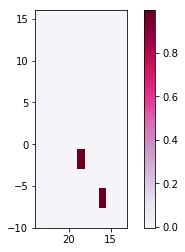


Nsat1


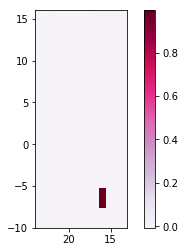


Nsat2


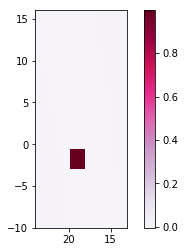

In [49]:
# Calculate number of satellite galaxies by subtracting interloper galaxies from near neighbor galaxies as a function 
# of color and magnitude.

Nsat = np.array(near) - np.array(Nbkg)

# print(len(Nsat))
# print(np.shape(Nsat))
print(Nsat[0])
# print(type(Nsat))
# Nsat = np.array(Nsat)
# print(type(Nsat))

print("Nsat0")
plt.imshow(Nsat[0], cmap=plt.cm.PuRd, extent=(xedges[0], xedges[len(xedges)-1], yedges[0], yedges[len(yedges)-1]))
plt.colorbar(orientation='vertical')
plt.gca().invert_xaxis()
# plt.title("Surface Density Histogram")
plt.show()
print("")

print("Nsat1")
plt.imshow(Nsat[1], cmap=plt.cm.PuRd, extent=(xedges[0], xedges[len(xedges)-1], yedges[0], yedges[len(yedges)-1]))
plt.colorbar(orientation='vertical')
plt.gca().invert_xaxis()
# plt.title("Surface Density Histogram")
plt.show()
print("")

print("Nsat2")
plt.imshow(Nsat[2], cmap=plt.cm.PuRd, extent=(xedges[0], xedges[len(xedges)-1], yedges[0], yedges[len(yedges)-1]))
plt.colorbar(orientation='vertical')
plt.gca().invert_xaxis()
# plt.title("Surface Density Histogram")
plt.show()
print("")

In [41]:
# # Here I want to calculate a mean Nsat in bins of projected radius

# # This is where I'm not sure I'm doing things correctly. I intend to calculate the mean of satellite galaxies binned
# # by radius from LRG. In this test, I split the r into three bins and added each 2D array together cell-wise and 
# # divided by the number of arrays in that r bin to get a 2D array of averages.

# rad = np.array(rad)
# print("r = ", r)
# # print(type(r))

# # Split r into three bins

# Nsat_low_r = Nsat[np.where((rad >= 0.002) & (0.0035 >= rad))]

# Nsat_med_r = Nsat[np.where((rad > 0.0035) & (0.005 >= rad))]

# Nsat_high_r = Nsat[np.where((rad > 0.005) & (0.006 >= rad))]

# # Calculate averages for three radius bins
# s_low = 0.
# for i in range(len(Nsat_low_r)):
#     s_low += Nsat_low_r[i]
    
# r_avg_low = s_low / len(Nsat_low_r)
# print("Average for (r >= 0.002) & (0.0035 >= r)")
# print(r_avg_low)

# print("---------")

# s_med = 0.
# for i in range(len(Nsat_med_r)):
#     s_med += Nsat_med_r[i]
    
# r_avg_med = s_med / len(Nsat_med_r)
# print("Average for (r > 0.0035) & (0.005 >= r)")
# print(r_avg_med)

# print("---------")

# s_high = 0.
# for i in range(len(Nsat_high_r)):
#     s_high += Nsat_high_r[i]
    
# r_avg_high = s_high / len(Nsat_high_r)
# print("Average for (r > 0.005) & (0.006 >= r)")
# print(r_avg_high)

z =  [ 0.32856104  0.27155562  0.33123652  0.18243929  0.4253285   0.42943555
  0.36138901  0.16409182  0.30826774  0.23110912  0.19999867  0.48112676
  0.4986228   0.11782255  0.44406441  0.34127624  0.25264239  0.21344729
  0.36998594  0.28273246  0.37434459  0.36473853  0.15319126  0.40713513
  0.4929653   0.48775526  0.34533073  0.11770425  0.10162206  0.15358901
  0.47640091  0.22114422  0.24645824  0.4592785   0.22574552  0.31959287
  0.27441238  0.12599767  0.33381849  0.43762716  0.16256757  0.18971959
  0.26514808  0.11476995  0.2986414   0.42719315  0.36315638  0.31339349
  0.4420503   0.15987525]
---------


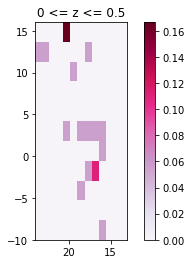

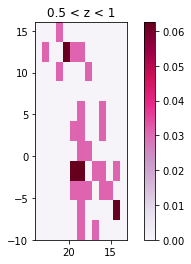

In [43]:
# Basically the same thing as above, except with redshift

z = np.array(z)
print("z = ", z)
# print(type(z))

# Use 0 < z <= 0.5, 0.5 < z <= 1

# 0 <= r <= 0.5
Nsat_low_z = Nsat[np.where((z >= 0.1) & (0.25 >= z))]

# 0.5 < r <= 1.
Nsat_high_z = Nsat[np.where((z > 0.25) & (0.5 >= z))]


# Calculate averages for three radius bins
s_low = 0.
for i in range(len(Nsat_low_z)):
    s_low += Nsat_low_z[i]
    
z_avg_low = s_low / len(Nsat_low_z)
# print("Average for 0 <= z <= 0.5")
# print(z_avg_low)

print("---------")

s_high = 0.
for i in range(len(Nsat_high_z)):
    s_high += Nsat_high_z[i]
    
z_avg_high = s_high / len(Nsat_high_z)
# print("Average for 0.5 < z < 1")
# print(z_avg_high)

plt.imshow(z_avg_low, cmap=plt.cm.PuRd, extent=(xedges[0], xedges[len(xedges)-1], yedges[0], yedges[len(yedges)-1]))
plt.colorbar(orientation='vertical')
plt.gca().invert_xaxis()
plt.title("0 <= z <= 0.5")
plt.show()

plt.imshow(z_avg_high, cmap=plt.cm.PuRd, extent=(xedges[0], xedges[len(xedges)-1], yedges[0], yedges[len(yedges)-1]))
plt.colorbar(orientation='vertical')
plt.gca().invert_xaxis()
plt.title("0.5 < z < 1")
plt.show()

In [22]:
# Add up all the satellites in each projected radius bin and plot the distribution

# Again, I'm not quite sure I'm hitting on what Greg wants. I intend to find the total number of satellites as a
# function of projected radius. So what I did was keep the r bins from above and added up each cell until I had one
# number per radius bin.

Nsat_tot_low_r = np.sum(Nsat_low_r)
Nsat_tot_med_r = np.sum(Nsat_med_r)
Nsat_tot_high_r = np.sum(Nsat_high_r)

# totals = np.array([Nsat_tot_low_r, Nsat_tot_med_r, Nsat_tot_high_r])
# totals = np.array([3, 5, 7])

print("Total Nsat (low r)")
print(Nsat_tot_low_r)
print("")
print("Total Nsat (med r)")
print(Nsat_tot_med_r)
print("")
print("Total Nsat (high r)")
print(Nsat_tot_high_r)
print("")


Total Nsat (low r)
5.61096117932

Total Nsat (med r)
21.7627846953

Total Nsat (high r)
18.7827239326

